In [19]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
import rasterstats
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
# Read the districts of Bangkok Metropolis shapefile 
districts = gpd.read_file(r'D:\Projects\Ajarn Noppol\005_COVID Project\COVID Thailand\Abstract\Subdis_Bkk.shp')

In [21]:
# Read the NO2 raster of before pandemic
no2 = rasterio.open(r'D:\Projects\Ajarn Noppol\005_COVID Project\COVID Thailand\Abstract\Version_2\Before_BKK_V2_Clip.tif', mode = 'r')


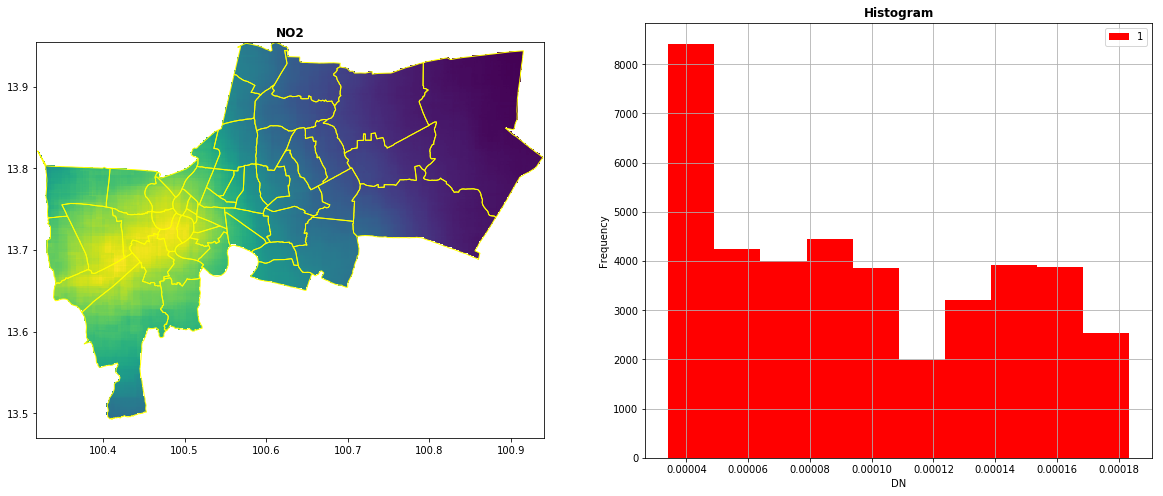

In [22]:
# Plotting the raster and the districts shapefile together 
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))
show(no2, ax = ax1, title = 'NO2')
districts.plot(ax = ax1, facecolor = 'None', edgecolor = 'yellow')
show_hist(no2, title = 'Histogram', ax = ax2)
plt.show()

In [23]:
# Assign raster values to a numpy nd array
nitrogendioxide_array = no2.read(1)

affine = no2.transform

In [24]:
# Calculating the zonal statistics 
avg_no2  = rasterstats.zonal_stats(districts, nitrogendioxide_array, affine = affine,
                                      stats = ['mean'], 
                                      geojson_out = True)

C:\ProgramData\Anaconda3\lib\site-packages\rasterstats\io.py:300: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [25]:
# Extracting the average NO2 data from the list
avg_nitrogendioxide = []
i = 0

while i < len(avg_no2):
    avg_nitrogendioxide.append(avg_no2[i]['properties'])
    i = i + 1

In [26]:
# Transfering the infromation from the list to a pandas DataFrame

avg_no2_bkk_dis_before = pd.DataFrame(avg_nitrogendioxide)
print(avg_no2_bkk_dis_before)

       ENGTYPE_3  ID_0  ID_1  ID_2  ID_3  ISO    NAME_0              NAME_1  \
0   Sub district   228     3    15   109  THA  Thailand  Bangkok Metropolis   
1   Sub district   228     3    16   110  THA  Thailand  Bangkok Metropolis   
2   Sub district   228     3    17   111  THA  Thailand  Bangkok Metropolis   
3   Sub district   228     3    18   112  THA  Thailand  Bangkok Metropolis   
4   Sub district   228     3    19   113  THA  Thailand  Bangkok Metropolis   
5   Sub district   228     3    20   114  THA  Thailand  Bangkok Metropolis   
6   Sub district   228     3    21   115  THA  Thailand  Bangkok Metropolis   
7   Sub district   228     3    22   116  THA  Thailand  Bangkok Metropolis   
8   Sub district   228     3    23   117  THA  Thailand  Bangkok Metropolis   
9   Sub district   228     3    24   118  THA  Thailand  Bangkok Metropolis   
10  Sub district   228     3    25   119  THA  Thailand  Bangkok Metropolis   
11  Sub district   228     3    26   120  THA  Thail

In [14]:
avg_no2_bkk_dis_before.to_csv('BKK_MeanNO2_District_Before.csv', encoding='utf-8')